# El problema no jerarquico de 3 cuerpos

In [7]:
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from numpy.linalg import norm
%matplotlib inline

# Ecuaciones diferenciales para el sistema de N-cuerpos
def eom(y,t,masas):
    M=len(y);N=M/6
    r=zeros((N,3));v=zeros((N,3))
    drdt=zeros((N,3));dvdt=zeros((N,3))    
    for i in xrange(N):
        r[i]=y[3*i:3*i+3];
        v[i]=y[3*N+3*i:3*N+3*i+3]

        
    # Derivadas
    for i in xrange(N):
        drdt[i]=v[i]
        for j in xrange(N):
            if i==j:continue
            dvdt[i]+=-masas[j]/norm(r[i]-r[j])**3*(r[i]-r[j])

    # Devuelve derivadasç
    dydt=array([])
    for i in xrange(N):dydt=concatenate((dydt,drdt[i]))
    for i in xrange(N):dydt=concatenate((dydt,dvdt[i]))
    return dydt

# Matriz de Rotación
def rotationMatrix(t,axis):
    R=identity(3)
    r=array([[cos(t),sin(t)],[-sin(t),cos(t)]])
    if axis=='z':R[0:2,0:2]=r
    elif axis=='x':R[1:3,1:3]=r
    else:
        R[0,0]=r[0,0];R[0,2]=r[0,1]
        R[2,0]=r[1,0];R[2,2]=r[1,1]
    return R

# Definición del Sistema

In [47]:
masa1=10.0
masa2=5.0
mu=masa1+masa2
r=3.0
vcirc=sqrt(mu/r)
vsmall=3.804

# Decomenta las siguientes líneas para usar una solución específica
# vcirc=2.2 
# vsmall= 3.75133030951881

sistema=[
    # Particula 0
    dict(
        m=masa1,
        r=[-1,0,0],
        v=[0,0,0]
    ),
    # Particula 1
    dict(
        m=masa2,
        r=[2,0,0],
        v=[0,vcirc,0]
    ),
    # Particula 2
    dict(
        m=0.01,
        r=[3.6,0,0],
        v=[0,vsmall,0]
    )
]
colors=['b','g','r']

# Prepara el Sistema de Partículas
Ntot=len(sistema)
masas=[]
rs=[];vs=[];ys=[]
for i in xrange(Ntot):
    particula=sistema[i]
    if particula['m']>0:
        masas+=[particula['m']]
        rs+=particula['r'];vs+=particula['v']

ys=rs+vs
M=len(ys)
N=M/6
Masa=sum(masas)

# Solución al movimiento respecto al centro de masa

In [62]:
Nt=1000
ts=linspace(0,30,Nt)

solucion=odeint(eom,ys,ts,args=(masas,))

rs=zeros((N,Nt,3))
vs=zeros((N,Nt,3))
for i in xrange(N):
    n=3*i
    rs[i]=solucion[:,n:n+3]
    m=3*N+3*i
    vs[i]=solucion[:,m:m+3]
    
# Posición del Centro de Masa
R = zeros((Nt,3))
for it in xrange(Nt):
    for n in xrange(N):
        R[it]+=masas[n]*rs[n,it]/Masa

# Velocidad del Centro de Masa
V=zeros((Nt,3))
for it in xrange(Nt):
    for n in xrange(N):
        V[it]+=masas[n]*vs[n,it]/Masa

# Refiere la posición de las partículas al centro de masa
for n in xrange(N):
    rs[n,:]=rs[n,:]-R
    vs[n,:]=vs[n,:]-V

# Gráfica del Movimiento

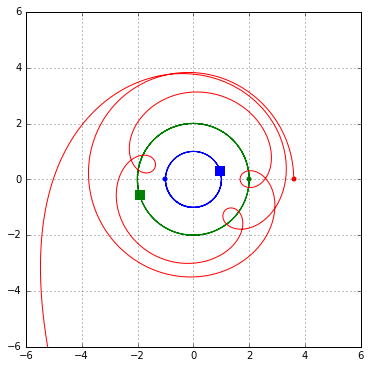

In [63]:
fig2d = plt.figure(figsize=(6,6))
ax2d=fig2d.gca()
for i in xrange(N):
    r=rs[i,:]
    ax2d.plot(r[:,0],r[:,1],color=colors[i])
    ax2d.plot(r[0,0],r[0,1],'o',color=colors[i],markersize=5,markeredgecolor='none')
    ax2d.plot(r[-1,0],r[-1,1],'s',color=colors[i],markersize=10,markeredgecolor='none')
    
ext=6
ax2d.set_xlim(-ext,ext)
ax2d.set_ylim(-ext,ext)
ax2d.grid()

# Problema relativo al cuerpo 2

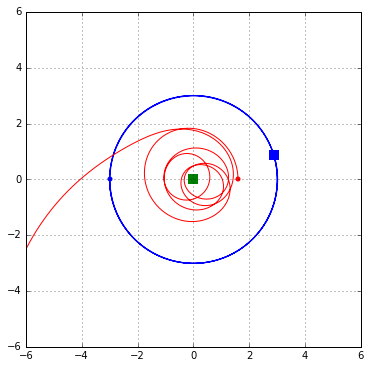

In [64]:
fig2d = plt.figure(figsize=(6,6))
ax2d=fig2d.gca()
for i in xrange(N):
    r=rs[i,:]-rs[1,:]
    ax2d.plot(r[:,0],r[:,1],color=colors[i])
    ax2d.plot(r[0,0],r[0,1],'o',color=colors[i],markersize=5,markeredgecolor='none')
    ax2d.plot(r[-1,0],r[-1,1],'s',color=colors[i],markersize=10,markeredgecolor='none')
    
ext=6
ax2d.set_xlim(-ext,ext)
ax2d.set_ylim(-ext,ext)
ax2d.grid()

# Transformación al sistema rotante del cuerpo 1 y 2

In [65]:
r12=rs[1,:]-rs[0,:]
tetas=arctan2(r12[:,1],r12[:,0])
npos=len(tetas)

rsr=zeros_like(rs)
for i in xrange(npos):
    Rtot=rotationMatrix(tetas[i],'z')
    for n in xrange(N):
        rsr[n,i]=Rtot.dot(rs[n,i])

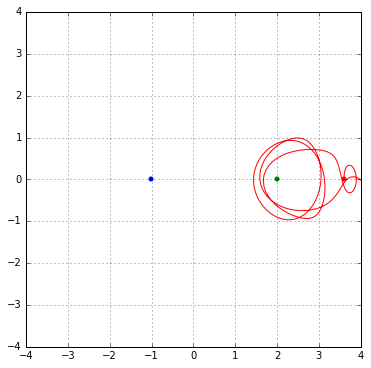

In [66]:
#  Gráfica del movimiento
fig2d = plt.figure(figsize=(6,6))
ax2d=fig2d.gca()
for i in xrange(N):
    r=rsr[i,:]
    ax2d.plot(r[:,0],r[:,1],color=colors[i])
    ax2d.plot(r[0,0],r[0,1],'o',color=colors[i],markersize=5,markeredgecolor='none')
    
ext=4
ax2d.set_xlim(-ext,ext)
ax2d.set_ylim(-ext,ext)
ax2d.grid()

# Constante de Jacobi

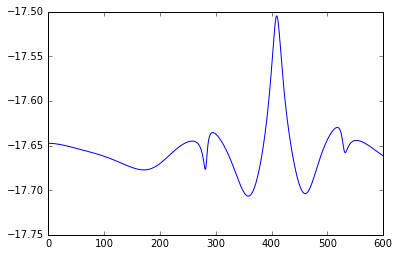

In [67]:
# Cantidades requeridas
r=rsr[2]
rho=sqrt(r[:,0]**2+r[:,1]**2)
r1=rsr[2,:]-rsr[0,:]
r2=rsr[2,:]-rsr[1,:]
a=norm(rsr[1,0]-rsr[0,0])
omega=sqrt((masas[0]+masas[1])/a**3)

# Velocidades en el sistema inercial
v=zeros_like(r);
for i in xrange(Nt):
    v[i]=vs[2,i]-cross(array([0,0,omega]),rs[2,i])

# Constante de Jacobi
C=[]
for i in xrange(Nt):
    C+=[norm(v[i])**2-2*masas[0]/norm(r1[i])-2*masas[1]/norm(r2[i])-omega**2*rho[i]**2]

plt.plot(C[:600])
#plt.ylim((-20,20))

# Superficie de Cero Velocidad

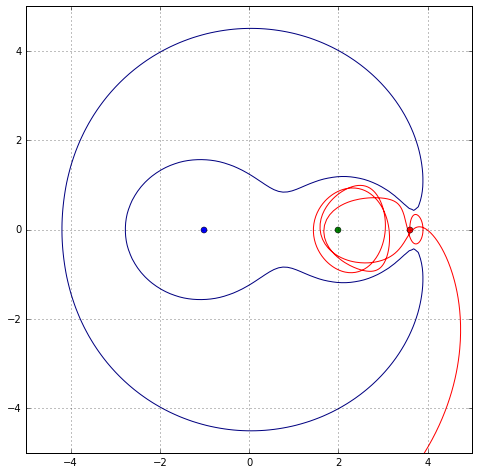

In [70]:
x=linspace(-5,5,100)
y=linspace(-5,5,100)

X,Y=meshgrid(x,y)

x1=-a*masa2/(masa1+masa2)
x2=+a*masa1/(masa1+masa2)

F=C[0]+2*masa1/sqrt((X-x1)**2+Y**2)+2*masa2/sqrt((X-x2)**2+Y**2)+omega**2*(X**2+Y**2)

fig=plt.figure(figsize=(8,8))
ax=fig.gca()

for i in xrange(N):
    ax.plot(rsr[i,:,0],rsr[i,:,1],color=colors[i])
    ax.plot(rsr[i,0,0],rsr[i,0,1],marker='o',color=colors[i])
  

ax.contour(X,Y,F,levels=[0,])

ext=5
ax.set_xlim(-ext,ext)
ax.set_ylim(-ext,ext)
ax.grid()
